In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [202]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [205]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [208]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')

Вывести несколько первых строк сгруппированных данных

In [211]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

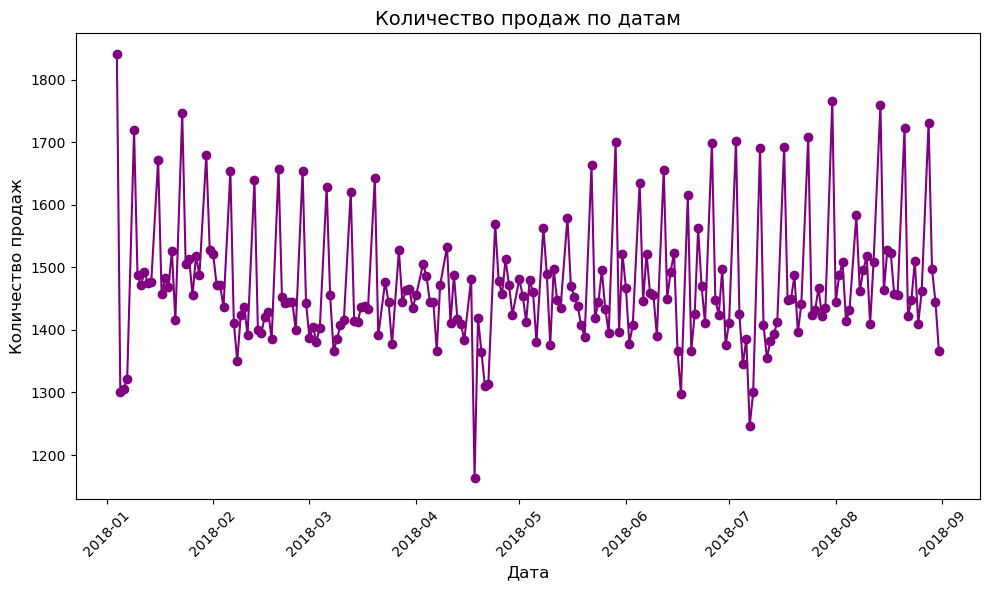

In [234]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], marker='o', linestyle='-', color='purple')
plt.title('Количество продаж по датам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
# Видно несколько резких всплесков продаж, когда значения поднимаются около 1800. С апреля по май сильное снижение продаж. График продаж слишком динамичный, с постоянными колебаниями, возможно сезонные изменения так влияют на продажи. 

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [115]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]
max_outlier = outliers.loc[outliers['Количество'].idxmax()]
max_outlier

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [118]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
filtered_df = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.weekday == 2) & (df['Склад'] == 3)]
grouped_df = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()
top_product = grouped_df.loc[grouped_df['Количество'].idxmax()]
top_product

Номенклатура    product_1
Количество           2267
Name: 1, dtype: object

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [223]:
weather_df = pd.read_csv('weather.csv', delimiter=',')
weather_df['T'] = weather_df['T'].astype(float)
weather_df.to_csv('weather_fixed.csv', index=False)
print(weather_df.head())

         Дата     T
0  31.08.2018   9.6
1  31.08.2018  11.3
2  31.08.2018  12.3
3  31.08.2018  13.2
4  31.08.2018  12.5


In [225]:
weather_df.columns

Index(['Дата', 'T'], dtype='object')

In [227]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], format='%Y-%m-%d')
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d.%m.%Y')
merged_df = pd.merge(grouped_df, weather_df, on='Дата', how='inner')
print(merged_df.head())

        Дата  Количество продаж     T
0 2018-01-04               1840 -17.2
1 2018-01-04               1840 -14.5
2 2018-01-04               1840  -9.6
3 2018-01-04               1840 -12.3
4 2018-01-04               1840 -12.6


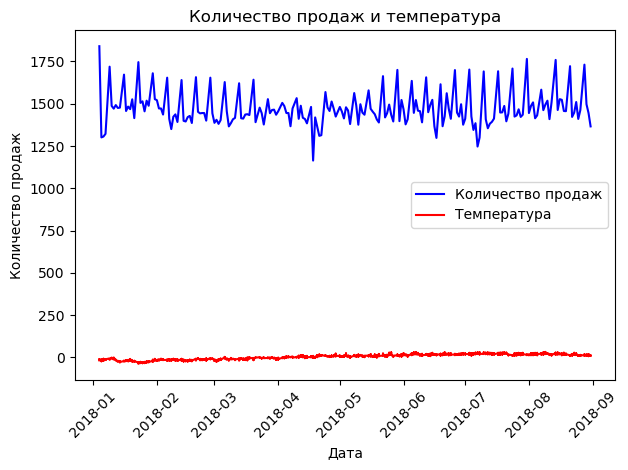

In [242]:
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж', color='b')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='r')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('Количество продаж и температура')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

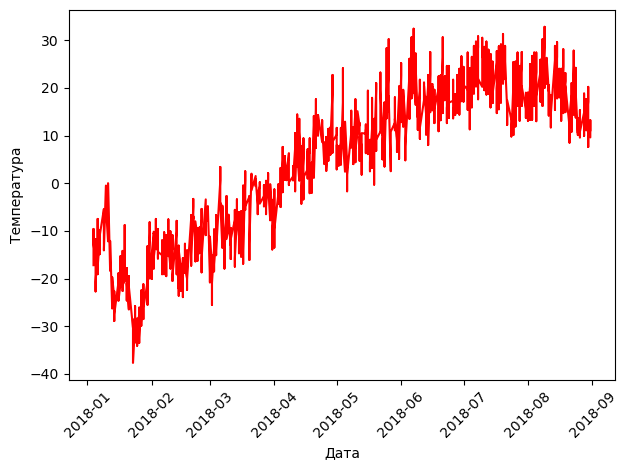

In [238]:
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='r')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()